In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3


In [21]:
interest_rate = pd.read_csv("../data/FEDFUNDS.csv")

In [22]:
interest_rate.set_index('DATE', inplace=True)

# 确保索引是DatetimeIndex
interest_rate.index = pd.to_datetime(interest_rate.index)

In [23]:
yearly_interest_rate = interest_rate["FEDFUNDS"].resample("Y").sum()

In [24]:
yearly_interest_rate

DATE
1954-12-31     6.05
1955-12-31    21.42
1956-12-31    32.74
1957-12-31    37.26
1958-12-31    18.87
              ...  
2019-12-31    25.90
2020-12-31     4.51
2021-12-31     0.96
2022-12-31    20.20
2023-12-31    49.63
Freq: A-DEC, Name: FEDFUNDS, Length: 70, dtype: float64

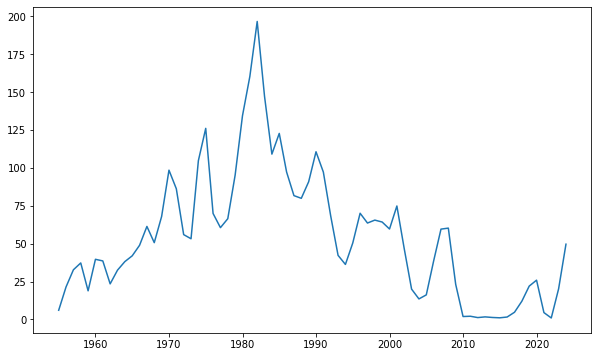

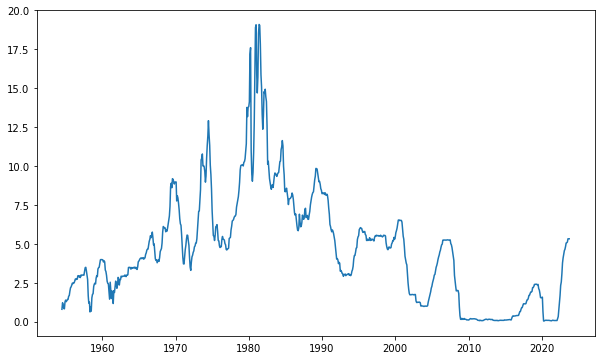

In [25]:
plt.figure(figsize=(10,6))
plt.plot(yearly_interest_rate)
plt.show()
plt.figure(figsize=(10,6))
plt.plot(interest_rate)
plt.show()


In [26]:
# connect to the sqlite database
conn = sqlite3.connect('../food_inflation_analysis.db')
query = '''SELECT * FROM OCED_USA_FOOD_INFLATION'''
cpi_food_data = pd.read_sql(query, conn)

In [27]:
cpi_food_data

,Date,Inflation
0,1956-01-01 00:00:00,-1.700680
1,1956-02-01 00:00:00,-2.372881
2,1956-03-01 00:00:00,-2.033898
3,1956-04-01 00:00:00,-1.689189
4,1956-05-01 00:00:00,-0.337838
...,...,...
799,2022-08-01 00:00:00,13.533210
800,2022-09-01 00:00:00,12.927050
801,2022-10-01 00:00:00,12.439140
802,2022-11-01 00:00:00,11.956870


In [28]:
cpi_food_data.set_index('Date', inplace=True)

# 确保索引是DateDateIndex
cpi_food_data.index = pd.to_datetime(cpi_food_data.index)


index1, index2 = cpi_food_data.align(interest_rate, join='inner')
print(cpi_food_data)
print(interest_rate)

# print(cpi_food_data[cpi_food_data.index==index1])
# print(df2)



            Inflation
Date                 
1956-01-01  -1.700680
1956-02-01  -2.372881
1956-03-01  -2.033898
1956-04-01  -1.689189
1956-05-01  -0.337838
...               ...
2022-08-01  13.533210
2022-09-01  12.927050
2022-10-01  12.439140
2022-11-01  11.956870
2022-12-01  11.882750

[804 rows x 1 columns]
            FEDFUNDS
DATE                
1954-07-01      0.80
1954-08-01      1.22
1954-09-01      1.07
1954-10-01      0.85
1954-11-01      0.83
...              ...
2023-06-01      5.08
2023-07-01      5.12
2023-08-01      5.33
2023-09-01      5.33
2023-10-01      5.33

[832 rows x 1 columns]


In [29]:
df1 = cpi_food_data.loc[index1.index].reset_index()
df2 = interest_rate.loc[index2.index].reset_index()

In [30]:
print(df1.shape)
print(df2.shape)

(804, 2)
(804, 2)


In [36]:
df2.rename(columns={'index':'Date'}, inplace=True)

In [37]:
df2

,Date,FEDFUNDS
0,1956-01-01,2.45
1,1956-02-01,2.50
2,1956-03-01,2.50
3,1956-04-01,2.62
4,1956-05-01,2.75
...,...,...
799,2022-08-01,2.33
800,2022-09-01,2.56
801,2022-10-01,3.08
802,2022-11-01,3.78


In [31]:
# compute correlation coefficient
correlation = df1['Inflation'].corr(df2['FEDFUNDS'],method='spearman')

print(f"The correlation coefficient between the two time series is: {correlation}")

The correlation coefficient between the two time series is: 0.4546493314671061


In [32]:
# save the test data to  the sqlite database as a new table
df2.to_sql('interest_rate', conn, if_exists='replace', index=False)

832

In [33]:
# get the database information
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(f"Tables in the database: {cursor.fetchall()}")


Tables in the database: [('test_data',), ('OCED_USA_FOOD_INFLATION',), ('food_production',), ('interest_rate',)]


In [34]:
# close the connection
conn.close()

Unexpected Status code:  401


SystemExit: 

m:\Anaconda3\envs\yolov5-master\lib\site-packages\IPython\core\interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
